<a href="https://colab.research.google.com/github/Afealete/FOXTROT-2-ASSIGNMENT-2/blob/main/FOXTROT_2_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study – Banking & Loans in Ghana

In today’s competitive and digitally driven financial environment, the ability to predict credit risk is a strategic advantage. GhanaLoanConnect, a digital lending platform connecting borrowers to investors, is actively seeking data-driven solutions to reduce its rate of non-performing loans (NPLs). Rising default rates not only impact profitability but also weaken lender trust and reduce platform credibility

To address this challenge, this project proposes the development of a machine learning model that can predict the likelihood of a borrower defaulting on a loan. With accurate predictions, GhanaLoanConnect can proactively minimize risk, prioritize low-risk borrowers, and enhance portfolio performance.

## Import common libraries

In [13]:
# to handle the data
import pandas as pd
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder

# machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score

# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import shap


## Load dataset

In [2]:
# Reading the dataset into the content folder
from google.colab import files
uploaded = files.upload()

#
data = pd.read_csv('/content/loan_borowwer_data.csv')
data

Saving loan_borowwer_data.csv to loan_borowwer_data (1).csv


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


# 1.Exploratory Data Analysis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
# Check for missing values
print(data.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


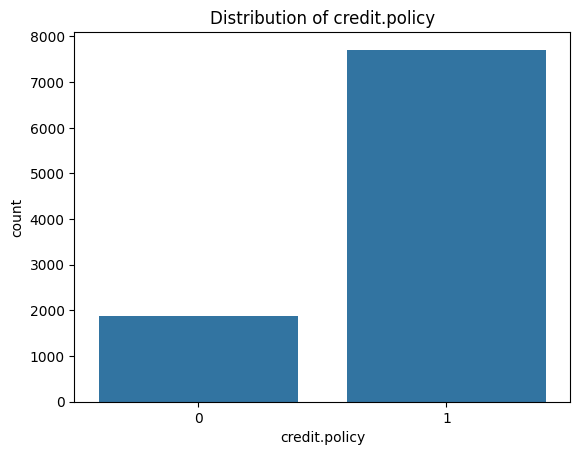

In [6]:
# Visualize the distribution of the target variable (credit.policy)
sns.countplot(x='credit.policy', data=data)
plt.title('Distribution of credit.policy')
plt.show()

## 2. Data Preprocessing

In [7]:
# One hot encoding for 'purpose' since is the only one with strings
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)

# Verify the changes
print(data.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

Distribution of credit.policy after oversampling:
credit.policy
1    7710
0    7710
Name: count, dtype: int64


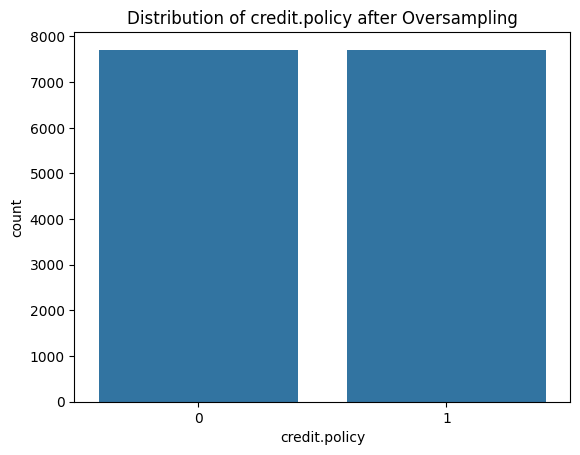

In [8]:
# Scaling to get equal distributions
from imblearn.over_sampling import RandomOverSampler

# Separate features and target
X = data.drop('credit.policy', axis=1)
y = data['credit.policy']

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Display the new distribution
print("Distribution of credit.policy after oversampling:")
print(y_resampled.value_counts())

# Visualizing the new distribution
sns.countplot(x=y_resampled)
plt.title('Distribution of credit.policy after Oversampling')
plt.show()


## 3. Feature Engineering

In [9]:
# 1
data['int_rate_fico'] = data['int.rate'] * data['fico']

# 2
data['revol_bal_to_inc_ratio'] = data['revol.bal'] / np.exp(data['log.annual.inc'])

# 3
data['inquiries_per_year'] = data['inq.last.6mths'] / (data['days.with.cr.line'] / 365.25)

# 4
data['negative_credit_events'] = data['delinq.2yrs'] + data['pub.rec']

# 5
data['fico_inverse'] = 1 / data['fico']

data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,int_rate_fico,revol_bal_to_inc_ratio,inquiries_per_year,negative_credit_events,fico_inverse
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,True,False,False,False,False,87.6293,0.339459,0.000000,0,0.001357
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,...,False,False,False,False,False,75.7197,0.517277,0.000000,0,0.001414
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,...,True,False,False,False,False,92.5474,0.109719,0.077548,0,0.001466
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,...,True,False,False,False,False,71.7696,0.396082,0.135280,0,0.001404
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,...,False,False,False,False,False,95.1142,0.058663,0.000000,1,0.001499


###1. Interaction term between 'int.rate' and 'fico'.
Rationale: The interest rate a person receives is often influenced by their credit score (FICO).
 An interaction term can capture how these two features jointly affect the target variable.

###2. A ratio of 'revol.bal' to 'log.annual.inc'.
Rationale: This ratio can represent the proportion of revolving balance relative to annual income, which might indicate financial strain or leverage.

###3. A feature representing the number of inquiries per year.
 Rationale: While 'inq.last.6mths' captures recent inquiries, understanding the frequency over the
 entire credit history ('days.with.cr.line') might be a better indicator of credit-seeking behavior.
 Convert days to years by dividing by 365.25 to account for leap years.

###4. A combined feature for negative credit events.
Rationale: Summing up 'delinq.2yrs' and 'pub.rec' can create a single metric for past negative credit history.

###5. A feature for the inverse of FICO score.
 Rationale: Sometimes, the relationship between a score and the target is not linear. The inverse might capture this non-linearity.

## 4. Model Selection and Training



--- Logistic Regression ---
Accuracy : 0.8990953375086986
Precision: 0.9094583670169766
Recall   : 0.9715025906735751
F1 Score : 0.9394572025052192
ROC-AUC  : 0.9037481196724051


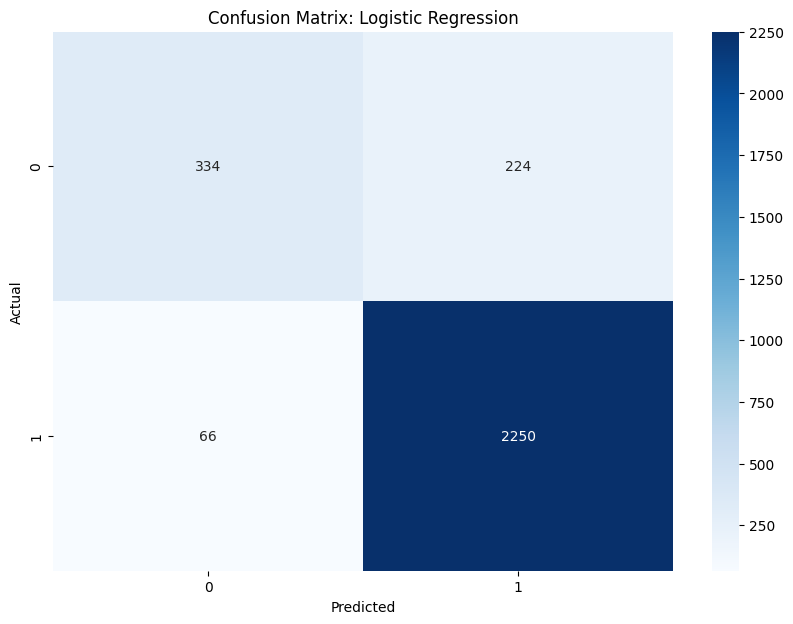


--- Random Forest ---
Accuracy : 0.9954766875434934
Precision: 0.996122361051271
Recall   : 0.998272884283247
F1 Score : 0.997196463230537
ROC-AUC  : 0.9994478955806885


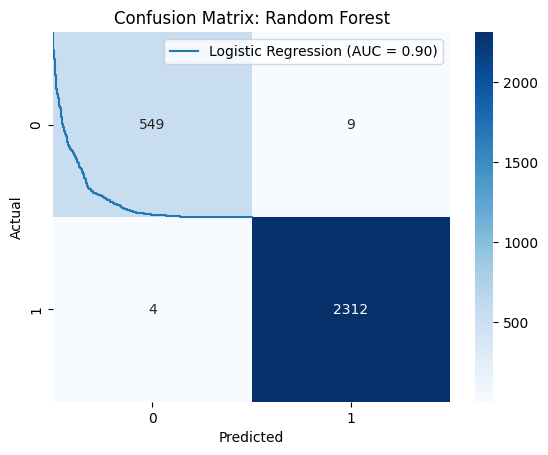


--- Gradient Boosting ---
Accuracy : 0.9965205288796103
Precision: 0.9969827586206896
Recall   : 0.9987046632124352
F1 Score : 0.9978429680759275
ROC-AUC  : 0.9995678341721297


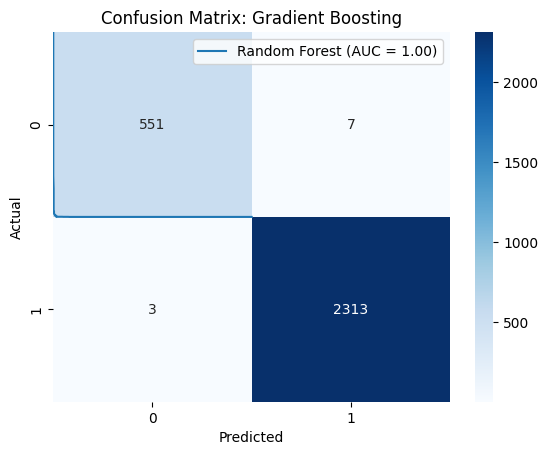

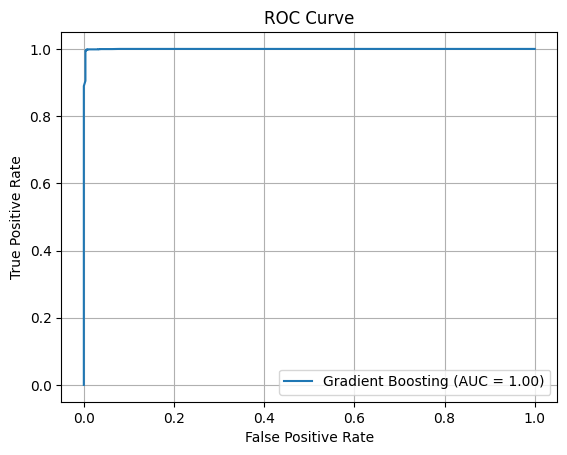

In [10]:

# 1. Data split
X = data.drop('credit.policy', axis=1)
y = data['credit.policy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 3. Evaluation function
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # for ROC-AUC and ROC curve

    print(f"\n--- {name} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_proba))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# 4. Evaluate all models
plt.figure(figsize=(10, 7))
for name, model in models.items():
    evaluate_model(name, model)

plt.grid(True)
plt.show()


Error Analysis

False Positives: 7 cases
False Negatives: 3 cases


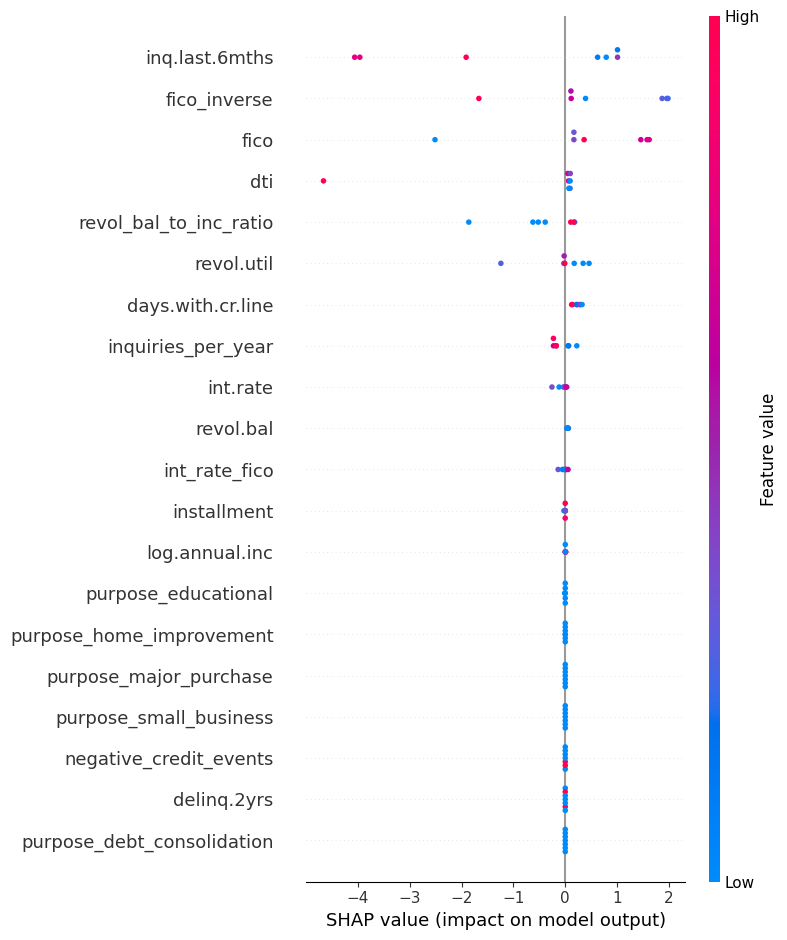

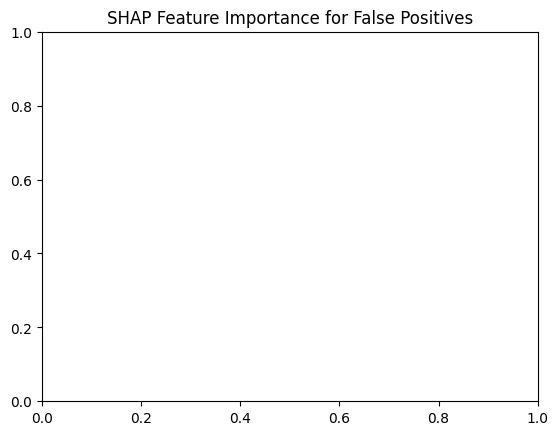

In [19]:
# Assuming data, X, y are already defined and preprocessed as in the original notebook cells

# Re-split the data just in case it was modified elsewhere
X = data.drop('credit.policy', axis=1)
y = data['credit.policy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate a model (e.g., the Gradient Boosting model that caused the error)
# In a real scenario, you would loop through models as in your previous cell
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

def error_analysis(model, X_test, y_test):
    """Analyze model errors and problematic cases"""

    # Make predictions and get probabilities BEFORE modifying X_test
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]

    # Create a new DataFrame or add columns to a copy of X_test for analysis
    X_test_analysis = X_test.copy() # Use a copy to avoid modifying the original X_test
    X_test_analysis['predicted'] = predictions
    X_test_analysis['probability'] = probabilities
    X_test_analysis['actual'] = y_test

    # False Positives (Predicted Converters that didn't)
    fp = X_test_analysis[(X_test_analysis['predicted'] == 1) & (X_test_analysis['actual'] == 0)].copy() # Use .copy() to avoid SettingWithCopyWarning
    print(f"False Positives: {len(fp)} cases")
    # False Negatives (Predicted Non-Converters that did)
    fn = X_test_analysis[(X_test_analysis['predicted'] == 0) & (X_test_analysis['actual'] == 1)].copy() # Use .copy()
    print(f"False Negatives: {len(fn)} cases")

    # Feature Importance for Error Cases (only if the model supports feature importance or SHAP)
    # Check if the model is tree-based for SHAP TreeExplainer
    if isinstance(model, (RandomForestClassifier, GradientBoostingClassifier, DecisionTreeClassifier)):
        try:
            explainer = shap.TreeExplainer(model)
            # SHAP values for False Positives - exclude the added columns for shap analysis
            shap_values_fp = explainer.shap_values(fp.drop(['predicted', 'probability', 'actual'], axis=1))

            # For binary classification, TreeExplainer returns a list with two arrays.
            # shap_values[0] for class 0, shap_values[1] for class 1.
            # We are interested in why predictions were 1 (False Positives), so use shap_values[1]
            if isinstance(shap_values_fp, list): # shap_values is a list for multi-output models or specific explainers
                 shap_values_fp = shap_values_fp[1]

            plt.figure(figsize=(10, 8))
            shap.summary_plot(shap_values_fp, fp.drop(['predicted', 'probability', 'actual'], axis=1))
            plt.title('SHAP Feature Importance for False Positives')
            plt.show()
        except Exception as e:
            print(f"Could not generate SHAP plot: {e}")
            print("Ensure the 'shap' library is installed (`!pip install shap`) and the model is compatible with TreeExplainer.")

    else:
        print("SHAP TreeExplainer is typically used for tree-based models. Skipping SHAP analysis.")


    return fp, fn

# Call the error_analysis function with a trained model and the original X_test, y_test
# You would ideally do this after selecting your best model from the evaluation loop
fp_cases, fn_cases = error_analysis(model, X_test, y_test)

Performance benchmarking


Model Benchmarking Results:
                 Model  CV Score (Mean)  CV Score (Std)  Test AUC
3              XGBoost         0.998835        0.001141  0.999644
2    Gradient Boosting         0.998054        0.001419  0.999568
1        Random Forest         0.998867        0.000544  0.999336
0  Logistic Regression         0.906489        0.011197  0.902132


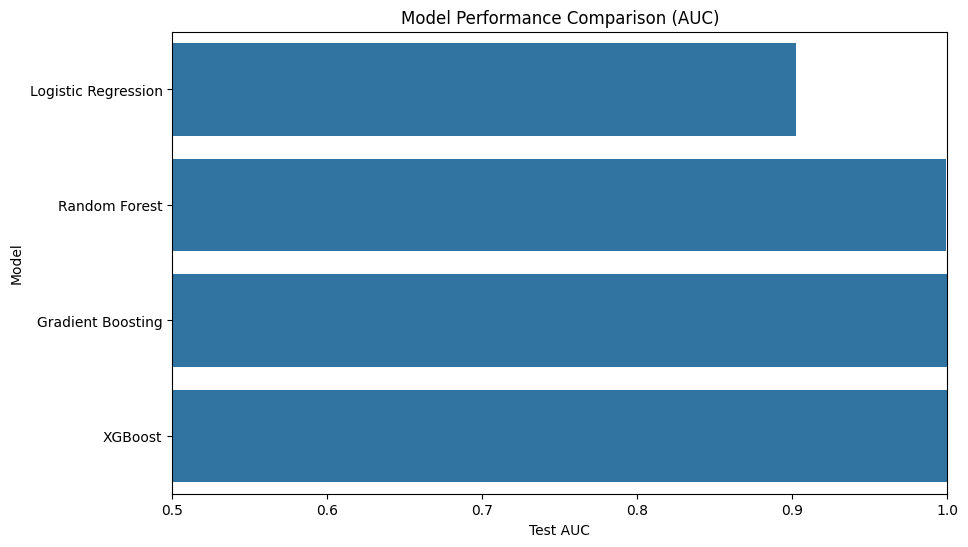

In [18]:
def benchmark_models(X_train, y_train, X_test, y_test):
    """Compare multiple models using cross-validation"""
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import GradientBoostingClassifier
    from xgboost import XGBClassifier # Import XGBoost

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
    }

    results = pd.DataFrame(columns=['Model', 'CV Score (Mean)', 'CV Score (Std)', 'Test AUC'])

    for name, model in models.items():
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

        # Test set evaluation
        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]
        test_auc = roc_auc_score(y_test, y_proba)

        # Corrected indentation for this line and the list elements
        results.loc[len(results)] = [
            name,
            cv_scores.mean(),
            cv_scores.std(),
            test_auc
        ]

    # Display results
    print("\nModel Benchmarking Results:")
    print(results.sort_values('Test AUC', ascending=False))

    # Plot comparison
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Test AUC', y='Model', data=results.sort_values('Test AUC'))
    plt.title('Model Performance Comparison (AUC)')
    plt.xlim(0.5, 1.0)
    plt.show()

    return results

benchmark_results = benchmark_models(X_train, y_train, X_test, y_test)